# SI 618 WN 2018 Homework 2: Improving an existing Jupyter notebook

## Submission Instructions:
Please turn in this Jupyter notebook file (both .ipynb and .html formats) on Canvas.

### Name:  Anthony Cozart
### Uniqname: jacozart
### People you worked with: Anna Lenhart

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set_palette('Set3', 10)
sns.set_context('talk')

In [3]:
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [4]:
# Read data
data = pd.read_csv('Netflix Shows.csv',encoding='cp437')

In [5]:
list(data)

['title',
 'rating',
 'ratingLevel',
 'ratingDescription',
 'release year',
 'user rating score',
 'user rating size']

In [6]:
data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


### Enhancement #1 

A few things stand out after a glimpse at the data. First, the naming of variables is confusing. 'ratingLevel' is a description, while 'ratingDescription' is a numeric value. These should be switched. 

More generally, throughout this code I'm going to make small enhancements that clarify and improve the consistency of the naming. 

I'll make note of when I do so. I'll make minor edits, like ensuring capitalization and spacers are similar across blocks of code.

In [7]:
data = data.rename(index=str, columns={"ratingLevel": "ratingDescription", "ratingDescription": "ratingLevel"})

In [8]:
data['ratingLevel'].describe()

count    1000.00000
mean       67.36600
std        30.78561
min        10.00000
25%        35.00000
50%        60.00000
75%        90.00000
max       124.00000
Name: ratingLevel, dtype: float64

In [9]:
data[data['ratingLevel']>100].describe()

,ratingLevel,release year,user rating score,user rating size
count,163.000000,163.000000,100.00000,163.000000
mean,111.288344,2015.944785,88.46000,80.773006
std,4.059319,1.479287,11.45692,0.976897
min,110.000000,2007.000000,56.00000,80.000000
25%,110.000000,2016.000000,82.00000,80.000000
50%,110.000000,2016.000000,93.50000,80.000000
75%,110.000000,2017.000000,97.00000,82.000000
max,124.000000,2017.000000,99.00000,82.000000


In [10]:
data['ratingDescription'].unique()

array(['crude and sexual humor, language and some drug content',
       'strong violence, sexual content and adult language',
       'Parents strongly cautioned. May be unsuitable for children ages 14 and under.',
       'Parental guidance suggested. May not be suitable for all children.',
       'For mature audiences.  May not be suitable for children 17 and under.',
       'language and brief violence', 'Suitable for all ages.',
       'This movie has not been rated.', nan,
       'Suitable for children ages 7 and older.  Content contains fantasy violence.',
       'bloody war violence, language throughout and some sexual material',
       'This movie has not been rated. Intended for adults only and may contain sex, violence, drugs, language or other adult themes.',
       'some thematic elements, rude humor and action',
       'pervasive language, some sexual material, violence and drug use',
       'mild thematic elements',
       'strong crude sexual content, pervasive language, a

While 'rating' is simple, 'ratingDescription' has a lot of richness to it. We'll use this later. 

One of the first graphs in the old code is a bar chart of the count of shows in our dataset by rating:

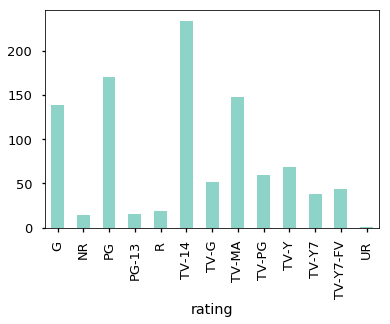

In [11]:
data.groupby(['rating']).size().plot(kind='bar')

Importantly, the author of the code made some assumptions when cleaning the data. He/She decided to replace missing values with a numeric value, 0; to drop unrated shows; and to drop the one show in the dataset from 1940. 

We'll need to keep this in mind later when posing research questions; these assumptions limit the external validity of our data (i.e., the representativeness) and will affect our visualizations.

In [12]:
data = data.fillna(value=0, axis=1)
data = data[data['rating'] != 'UR']
data = data[data['release year']>1940]

### Enhancement #2
The Netflix data includes TV shows and movies, which are rated on different scales by different rating agencies. TV parental guidelines are set by the FCC, while movie parental guidelines are from the MPAA.

TV ratings are TV-Y, TV-Y7, TV-G, TV-PG, TV-14 or TV-MA.
Movie ratings are G, PG, PG-13, R, NC-17.

Our analysis should consider TV shows and movies on Netflix separately, and then, compare them.

Below, I make this enhancement, by creating a new variable "Movie." Movie = 'Yes' if the row is a movie, and 'No' otherwise. 

I then use a mask to create separate dataframes for movies and TV shows, and will reproduce the original graphs for the separate dataframes.

In [13]:
data['movie'] = np.where((data.rating == "G") | (data.rating == "PG") |
                          (data.rating == "PG-13") | (data.rating == "R") |
                          (data.rating == "NC-17") | (data.rating == "NR"), 'Yes', 'No')

In [14]:
data.head()

,title,rating,ratingDescription,ratingLevel,release year,user rating score,user rating size,movie
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,Yes
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82,Yes
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,No
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80,No
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80,No


In [15]:
# Create separate dataframes for movies, tv shows
movies = data[data.movie == 'Yes']
shows = data[data.movie == 'No']

In [16]:
print("The number of rows in the movies dataset is: ", len(movies))
print("The number of rows in the shows dataset is: ", len(shows))

The number of rows in the movies dataset is:  353
The number of rows in the shows dataset is:  643


In [17]:
movies.groupby('rating')['user rating score'].mean().sort_values()

rating
NR       24.857143
G        31.259259
R        41.263158
PG-13    54.266667
PG       60.341176
Name: user rating score, dtype: float64

In [18]:
# This code is new -- performing the same groupby as above for movies.
shows.groupby('rating')['user rating score'].mean().sort_values()

rating
TV-Y7       27.236842
TV-Y7-FV    27.386364
TV-Y        27.794118
TV-G        34.384615
TV-MA       57.418919
TV-PG       61.118644
TV-14       69.435897
Name: user rating score, dtype: float64

### Enhancement #3
The original analyis presented a bar graph, reproduced below, showing the average 'user rating score' for each of the ratings. It's not the helpful. The first issue is that it has both TV and movie ratings. The second, but more important, issue is that because we've replaced missing values of 'user rating score' with zero, the mean for each rating will be determined -- to a large degree -- by the frequency of missing data. 

We see a very different picture when dropping the movies and tv shows for which the user rating score is missing; the means across ratings are roughly similar, bounded between 73 and 88.

Lastly, as part of Enhancement #3 I present scatter plots, as another way to visualize the relationship between guidance rating level and user rating score. For both movies and tv shows, we see that there's a lot of variability in user rating score by rating level -- in other words, for most rating levels, there are some good movies, some mediocre movies, and some bad movies.

In [19]:
d = data[data['user rating score'] > 0]
m = movies[movies['user rating score'] > 0]
s = shows[shows['user rating score'] > 0]

In [28]:
print("After dropping rows with missing user ratings, the movies dataset has {0:d} rows.".format(len(m)))
print("(Percentage of rows dropped = {0:%})".format(1-(len(m)/len(movies))))
print("--")
print("After dropping rows with missing user ratings, the tv shows dataset has {0:d} rows.".format(len(s)))
print("(Percentage of rows dropped = {0:%})".format(1-(len(s)/len(shows))))

After dropping rows with missing user ratings, the movies dataset has 197 rows.
(Percentage of rows dropped = 44.192635%)
--
After dropping rows with missing user ratings, the tv shows dataset has 405 rows.
(Percentage of rows dropped = 37.013997%)


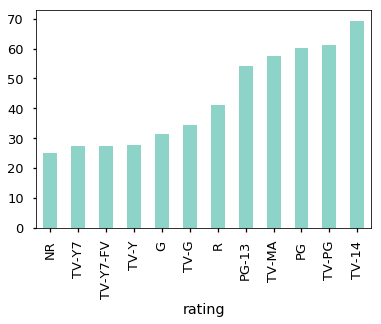

In [44]:
# Original bar chart
data.groupby('rating')['user rating score'].mean().sort_values().plot(kind='bar')

### Question: 
Suppose we're interested in how user rating score correlates with the rating. Do PG-13 movies score higher than PG movies? Do R movies score higher than PG-13 movies? The barchart above doesn't leave us with a good answer. TV-Y7, which is TV shows for young children, scores very low but the category above it in the rating scale, TV-14 is the highest of any! Similarly, R movies are rated lower than PG moves. HMMMMMM.

By breaking out the data -- into movies and TV shows -- we can get a much better sense of the relationship between user rating score and the rating.

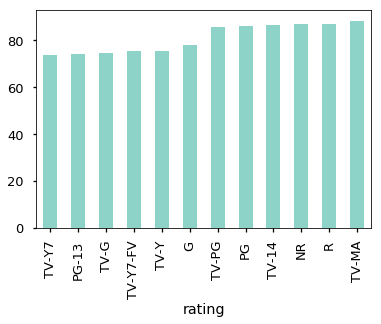

In [29]:
# After dropping rows with missing user rating data
d.groupby('rating')['user rating score'].mean().sort_values().plot(kind='bar')

In [30]:
d.groupby('rating')['user rating score'].mean().sort_values()

rating
TV-Y7       73.928571
PG-13       74.000000
TV-G        74.500000
TV-Y7-FV    75.312500
TV-Y        75.600000
G           78.148148
TV-PG       85.857143
PG          86.201681
TV-14       86.425532
NR          87.000000
R           87.111111
TV-MA       88.520833
Name: user rating score, dtype: float64

(As part of Enhancement #2, here are separate bar charts for TV shows and movies:)

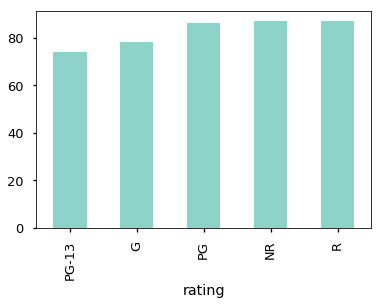

In [31]:
m.groupby('rating')['user rating score'].mean().sort_values().plot(kind='bar')

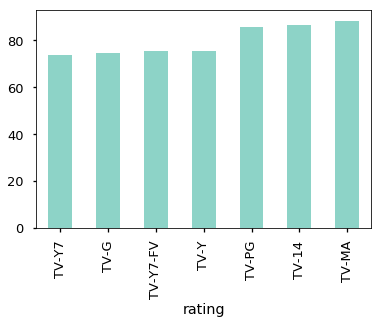

In [32]:
s.groupby('rating')['user rating score'].mean().sort_values().plot(kind='bar')

Another way to visualize the question above -- how do user rating score and rating correlate with each other -- is to use a scatter plots, which I present below:

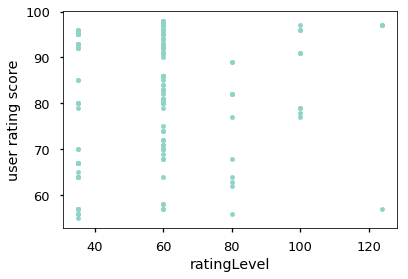

In [33]:
m.plot(kind='scatter', x='ratingLevel', y='user rating score')

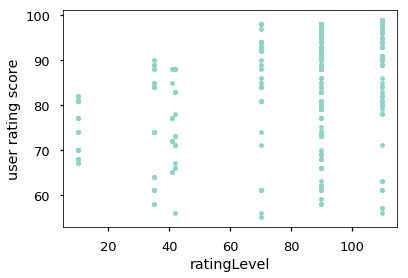

In [34]:
s.plot(kind='scatter', x='ratingLevel', y='user rating score')

These scatter plots aren't all that helpful. Let's try using violin plots, which say a bit more about the distribution of rating scores. Interestingly, we can conclude that the distribution for movies is a bit tighter, across all ratings except 'NR'!

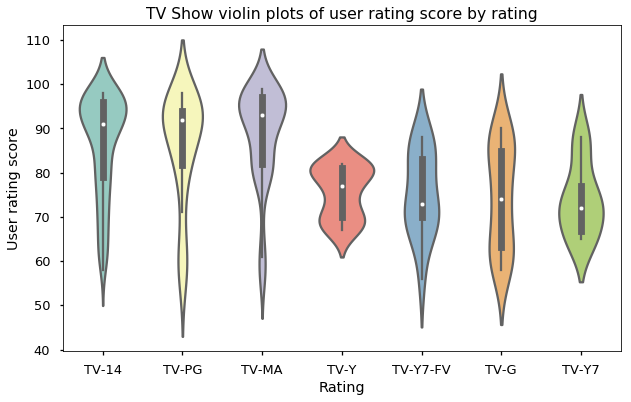

In [57]:
## violin plots for TV shows
plt.figure(figsize=(10,6))
sns.violinplot(x='rating', y='user rating score', data=s)
plt.title('TV Show violin plots of user rating score by rating')
plt.xlabel('Rating')
plt.ylabel('User rating score')
plt.show()

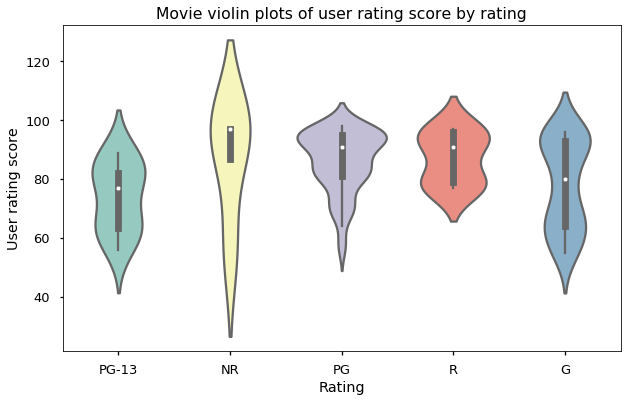

In [58]:
## violin plots for movies
plt.figure(figsize=(10,6))
sns.violinplot(x='rating', y='user rating score', data=m)
plt.title('Movie violin plots of user rating score by rating')
plt.xlabel('Rating')
plt.ylabel('User rating score')
plt.show()

### (Part of) Enhancement #2
The original code had a bar chart of the number of entries per year. We can instead plot separately for movies and TV shows: 

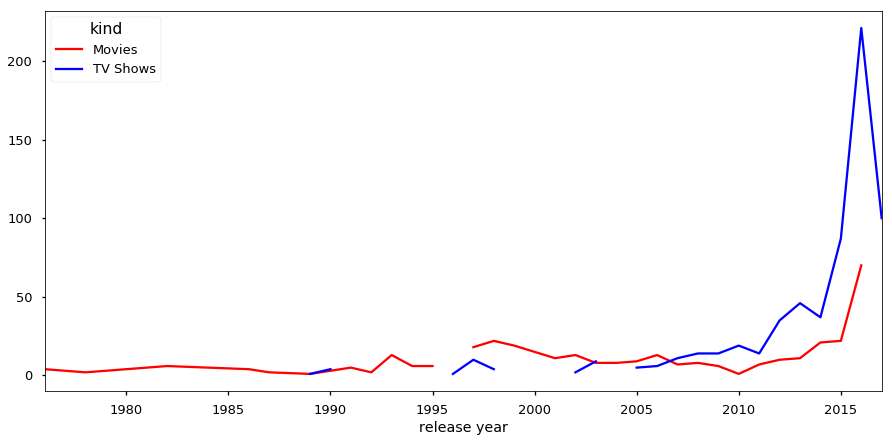

In [35]:
# Create a new variable, 'kind', so that the plot has a more informative legend
data['kind'] = np.where((data.movie == 'Yes'), 'Movies', 'TV Shows')
f, ax = plt.subplots(figsize=(15,7))
data.groupby(['release year','kind']).size().unstack().plot(ax=ax, color=['red','blue'])
# use unstack() when plotting
# More info here: https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html)

This doesn't pose a question, but highlights a limitation of our data -- that it includes very few movies or TV shows for many years, but has many many of both in 2016.

In [36]:
# Could do groupby with two elements (including movie indicator); but do separately so it's easier to make graphs
shows_counts = shows.groupby('rating')['rating'].count()
movies_counts = movies.groupby('rating')['rating'].count()

### A general note (part of Enhancement #1)
I'm going to rename the variable "movie_genre" as "tv_guidance" and "movie_guidance." A genre is the type of movie (e.g., Drama) and not the rating assigned as guidance for viewers (e.g., PG-13).

In [37]:
tv_guidance = shows[shows.rating.isin(shows_counts.keys())]
movies_guidance = movies[movies.rating.isin(movies_counts.keys())]

In [38]:
# Create table of user ratings, by audience rating, aggregating to find the average by year 
table_tvscores = pd.pivot_table(tv_guidance, values=['user rating score'],
                             index=['release year'], columns=['rating'],
                             aggfunc='mean', margins=False)

table_moviesscores = pd.pivot_table(movies_guidance, values=['user rating score'],
                             index=['release year'], columns=['rating'],
                             aggfunc='mean', margins=False)

In [39]:
movies_guidance

,title,rating,ratingDescription,ratingLevel,release year,user rating score,user rating size,movie
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,Yes
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82,Yes
14,The Hunter,R,language and brief violence,100,2011,0.0,82,Yes
19,The 100,NR,This movie has not been rated.,124,2016,97.0,80,Yes
22,Nymphomaniac: Volume 1,NR,This movie has not been rated.,124,2013,0.0,82,Yes
23,Hunter X Hunter (2011),NR,This movie has not been rated.,124,2013,57.0,80,Yes
35,Hyena Road,R,"bloody war violence, language throughout and s...",100,2015,0.0,82,Yes
37,"Sex, Love and Therapy",NR,This movie has not been rated.,124,2014,0.0,82,Yes
46,Stronger Than the World,NR,0,124,2016,0.0,82,Yes
47,Back and Forth,NR,This movie has not been rated.,124,2016,0.0,82,Yes


In [40]:
# Create a similar table that gives the count of films per year for each audience rating
table_tvcount = pd.pivot_table(tv_guidance, values=['user rating score'],
                           index=['release year'], columns=['rating'],
                           aggfunc='count', margins=False)
table_moviescount = pd.pivot_table(movies_guidance, values=['user rating score'],
                           index=['release year'], columns=['rating'],
                           aggfunc='count', margins=False)

### Question:
The original code included heatmaps of the combined average of movies and shows across years and by rating, to see if user rating scores were trending up or down, and how they vary across time. I've now done this analysis separately for TV shows and for movies.

Takeaways:
- TV shows that are rated TV-14 are more likely than TV shows with other ratings to be good. 
- Similarly, in the 1990s, there were lots of PG movies that were rating highly.
- But both heatmaps highlights the holes in Netflix's catalog (and our data)

Text(0.5,1,'Average scores of TV shows')

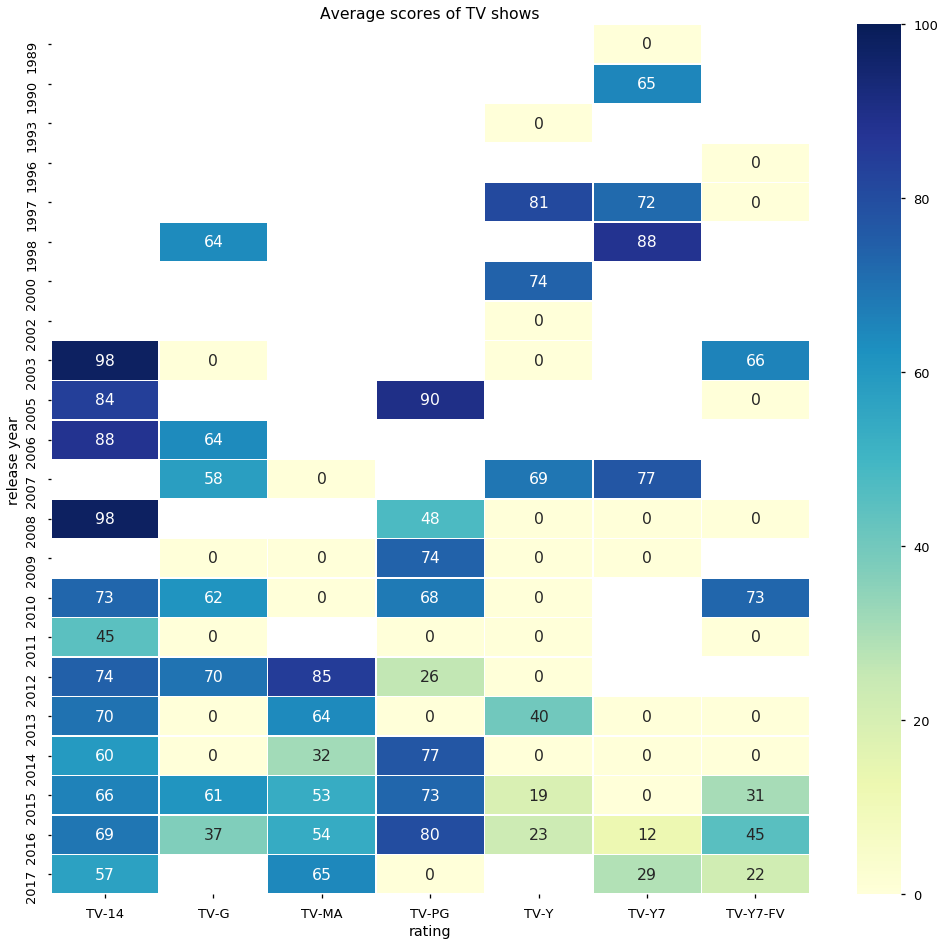

In [41]:
# Make a heatmap of average scores of TV shows, by year
plt.figure(figsize=(17,16))
sns.heatmap(table_tvscores['user rating score'], linewidths=.5, 
            annot=True, vmin=0, vmax=100, cmap='YlGnBu')
plt.title('Average scores of TV shows')

Text(0.5,1,'Average scores of movies')

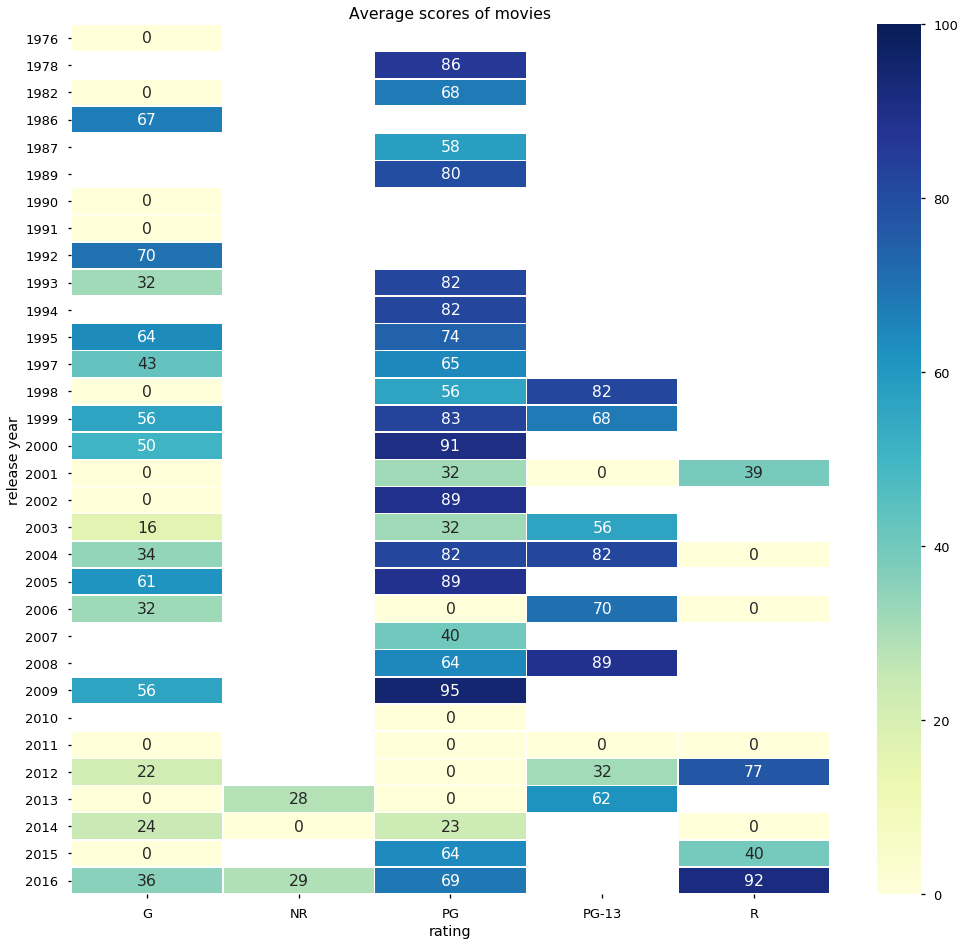

In [42]:
# NEW Make a heatmap of average scores of movies, by year
plt.figure(figsize=(17,16))
sns.heatmap(table_moviesscores['user rating score'], linewidths=.5, 
            annot=True, vmin=0, vmax=100, cmap='YlGnBu')
plt.title('Average scores of movies')

We can make similar heatmaps for the number of TV shows and movies in each category, per year.

Text(0.5,1,'Count of TV shows')

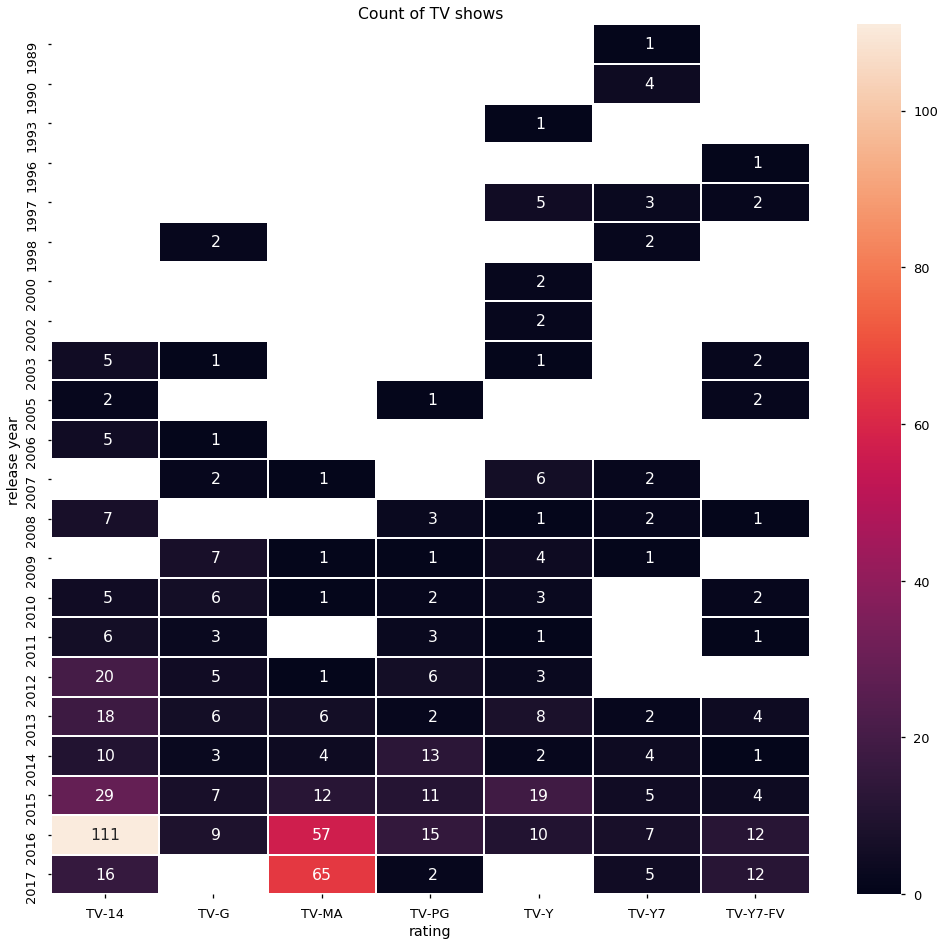

In [43]:
# Make a heatmap for the number of TV shows per year
plt.figure(figsize=(17,16))
sns.heatmap(table_tvcount['user rating score'], linewidths=1, 
            annot=True, fmt='2.0f', vmin=0)
plt.title('Count of TV shows')

This visualization helps us to see how unbalanced our data is. Most of the TV shows are either TV-14 or TV-MA shows from 2016 and 2017. If we wanted to do good statistical inference, we'd need more observations and more variation.

Text(0.5,1,'Count of Movies')

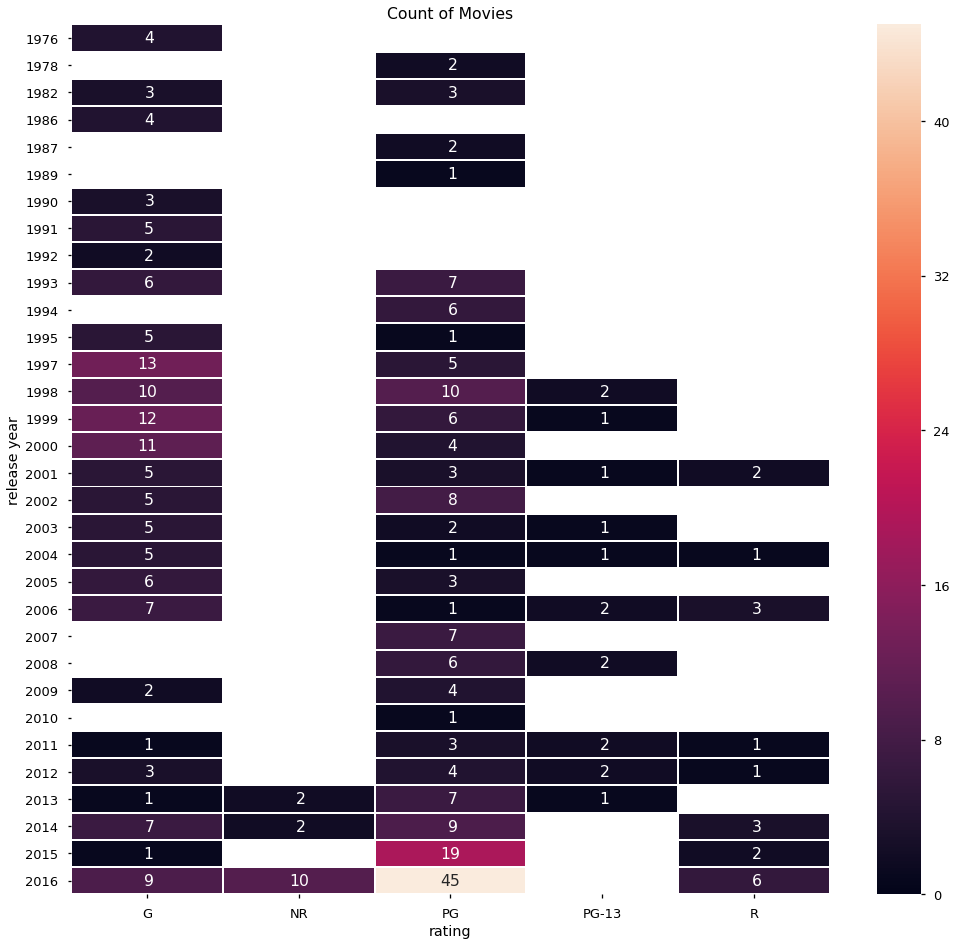

In [44]:
# NEW Make a heatmap for the number of movies per year
plt.figure(figsize=(17,16))
sns.heatmap(table_moviescount['user rating score'], linewidths=1, 
            annot=True, fmt='2.0f', vmin=0)
plt.title('Count of Movies')

### Enhancement #4
This is a simple enhancement, but pie charts generally are a terrible way to present data. I've gotten rid of the pie chart showing the percent of movies for each rating, which was cluttered and not helpful (it's hard to visually depict the size differences)! I've made simple bar charts instead, using an apply function to calculate the fraction of all movies (or TVs) for each rating. That means the bar charts are percentages!

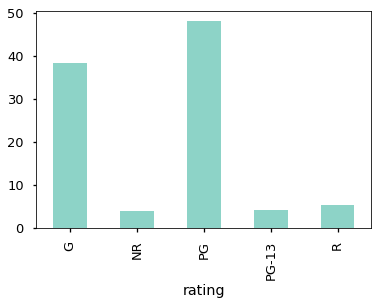

In [46]:
movies.groupby(['rating']).size().apply(lambda x: (x / len(movies))*100).plot(kind='bar')

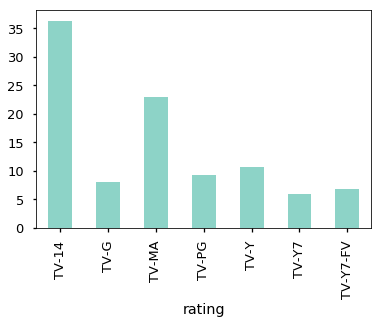

In [47]:
shows.groupby(['rating']).size().apply(lambda x: (x / len(shows))*100).plot(kind='bar')

KDEPlots visualize the distribution of data, much like a heatmap. The difference is that KDEPlots use estimation techniques to guess the bin size (much like a histogram bin size kernel would). The original code included a KDEPlot of use rating score by release year, which I reproduce separately for movies and TV shows below:

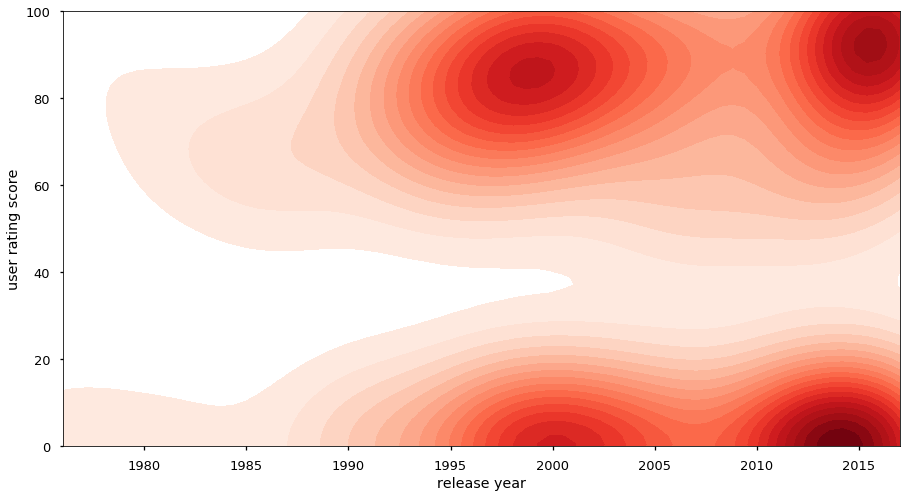

In [49]:
# Create kdeplot of user rating score for MOVIES by release year
plt.figure(figsize=(15,8))
plt.xlim(1976,2017)
plt.ylim(0,100)
sns.kdeplot(movies['release year'], movies['user rating score'], n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

We can run a similar KDEPlot for TV shows

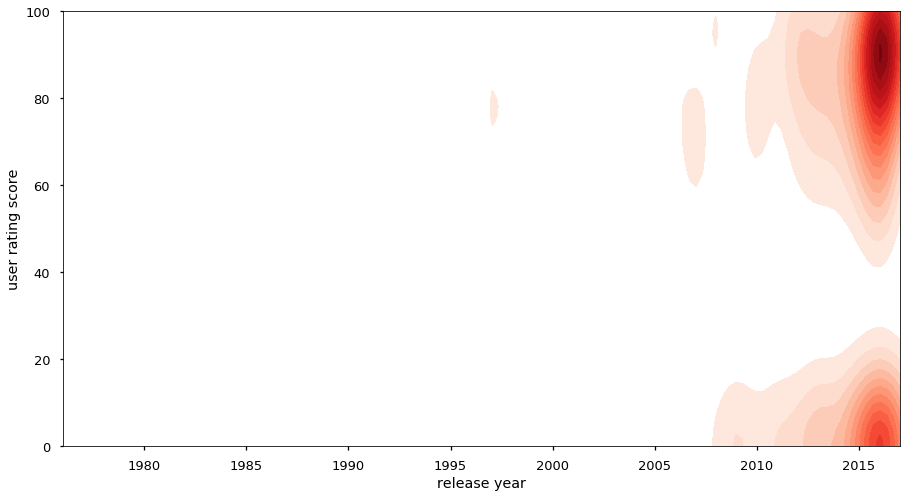

In [50]:
# NEW Create kdeplot of user rating score for SHOWS by release year
plt.figure(figsize=(15,8))
plt.xlim(1976,2017)
plt.ylim(0,100)
sns.kdeplot(shows['release year'], shows['user rating score'], n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

### Enhancement #5
Both of these KDEPlots are misrepresentative.

Why? There are two hotspots -- one around 80, the other around 0 -- only because we assign a user rating = 0 for missing data. Let's re-do the plots, updating the x and y limits to create more helpful visualization that can help us understand the distribution of our data.

Note: Recall from before that m and s are the dataframes for movies and shows, respectively, that drop rows where user data was missing.

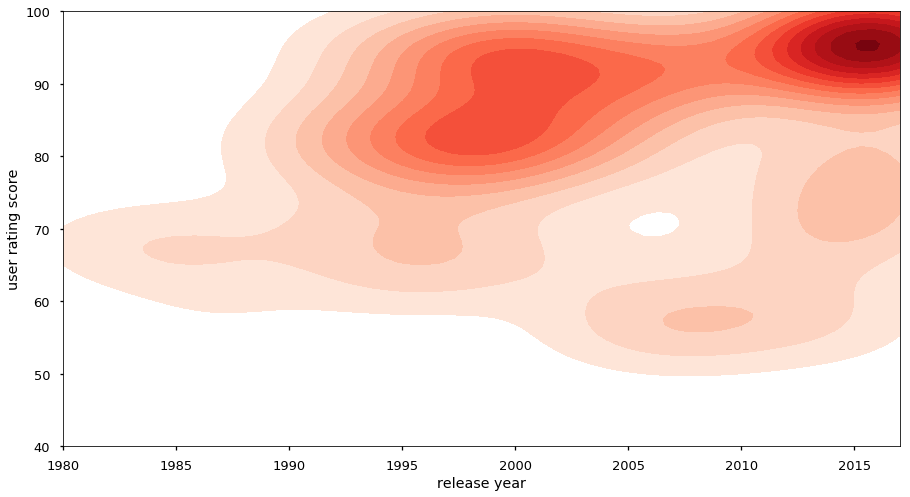

In [52]:
# For Movies
plt.figure(figsize=(15,8))
plt.xlim(1980,2017)
plt.ylim(40,100)
sns.kdeplot(m['release year'], m['user rating score'], n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

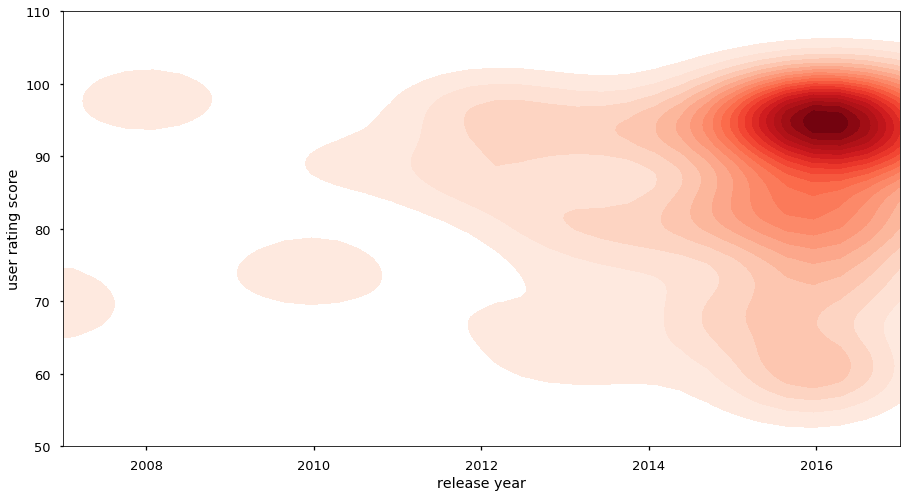

In [53]:
# For TV Shows
plt.figure(figsize=(15,8))
plt.xlim(2007,2017)
plt.ylim(50,110)
sns.kdeplot(s['release year'], s['user rating score'], n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

### Enhancement #6
The ratingsDescription field for the original dataset has 99 unique values.

However, the majority of these descriptions come from the movies -- there are only 8 unique descriptions for TV shows. These descriptions for movies contain rich information -- like sexual scenes or violence. Extracting this data using regex gives us a sense of how movies may be changing.

Extract the following terms: violence (or violent), sexual (or nudity), and language.

In [60]:
data['ratingDescription'].describe()

count                                                   996
unique                                                   99
top       Parents strongly cautioned. May be unsuitable ...
freq                                                    224
Name: ratingDescription, dtype: object

In [61]:
print("There are {0:d} ratingsDescriptions in the Netflix data.".format(
    len(data['ratingDescription'].unique())))
print("There are {0:d} descriptions for movies.".format(
    len(movies['ratingDescription'].unique())))
print("There are {0:d} descriptions for TV shows.".format(
    len(shows['ratingDescription'].unique())))

There are 99 ratingsDescriptions in the Netflix data.
There are 92 descriptions for movies.
There are 8 descriptions for TV shows.


In [62]:
print(len(movies[movies['ratingDescription'].str.contains('violence|violent')==True]))
print(len(movies[movies['ratingDescription'].str.contains('sexual|nudity')==True]))
print(len(movies[movies['ratingDescription'].str.contains('language')==True]))
# movies.loc[movies['ratingDescription'].str.contains('violence|violent') == True]

34
22
77


In [63]:
movies['language_flag'] = np.where(movies['ratingDescription'].str.contains("language", case=False, na=False), 1, 0)
movies['sex_flag'] = np.where(movies['ratingDescription'].str.contains('sexual|nudity', case=False, na=False), 1, 0)
movies['violence_flag'] = np.where(movies['ratingDescription'].str.contains('violence|violent', case=False, na=False), 1, 0)

/Applications/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/envs/si618/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [64]:
movies.head()

,title,rating,ratingDescription,ratingLevel,release year,user rating score,user rating size,movie,language_flag,sex_flag,violence_flag
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80,Yes,1,1,0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82,Yes,1,1,1
14,The Hunter,R,language and brief violence,100,2011,0.0,82,Yes,1,0,1
19,The 100,NR,This movie has not been rated.,124,2016,97.0,80,Yes,0,0,0
22,Nymphomaniac: Volume 1,NR,This movie has not been rated.,124,2013,0.0,82,Yes,0,0,0


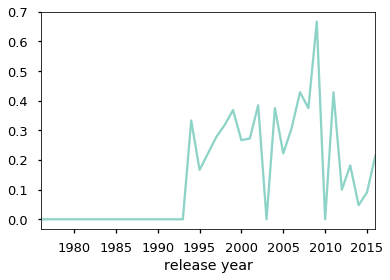

In [68]:
movies.groupby('release year')['language_flag'].mean().plot()

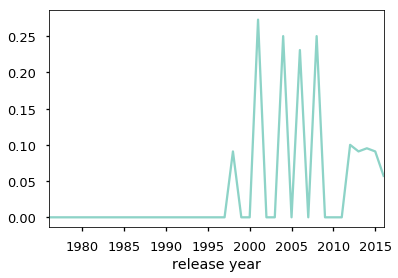

In [69]:
movies.groupby('release year')['sex_flag'].mean().plot()

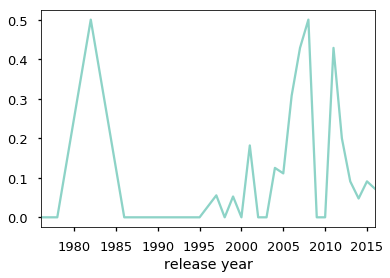

In [70]:
movies.groupby('release year')['violence_flag'].mean().plot()

While simple, we can now see how more and more movies during the 2000s had bad language, but that the amount of violence and sex has been more volatile. Of course, we'd want to dig deeper into the data (and increase the size of our dataset) and improve our text recognition approach -- but this is a start!

### Above and Beyond:

Why is my code exceptional?
- Instead of finding new, complex packages or defining new functions, I've kept it simple, using Pandas whenever possible even if there are other approaches (like Regular Expressions).
- I've tried to understand the data presented, instead of looking for new data (which I'm curious about). But there's so much to learn from this data, for example, that it's actually BOTH TV shows and movies. (Maybe the Kaggle page should be updated. :))
- I've taken care to think about how earlier data manipulation -- like how we treat missing values -- affects our visualization and summary statistics. Doing so is integral to presenting work to others, particularly bosses.
- I've asked, clarified, and explained questions posed by the data. For example, can we see a relationship between rating and user rating score? I've used a variety of viz tools to present answers, and the readers can decide for themselves. :)